<a href="https://colab.research.google.com/github/rukundob451/MachineLearning/blob/main/Automated_Sentiment_Analysis_Using_DistilBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers

In [2]:
import pandas as pd
df = pd.read_csv('reviews_data.csv')
df.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


In [3]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Function to perform sentiment analysis
def analyze_sentiment(review):
    inputs = tokenizer(review, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    return model.config.id2label[predicted_class_id]

# Analyze sentiment for each review and store the results in a new column
df['SENTIMENT'] = df['Review'].apply(analyze_sentiment)
df.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

,name,location,Date,Rating,Review,Image_Links,SENTIMENT
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],POSITIVE
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images'],POSITIVE
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,NEGATIVE
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images'],POSITIVE
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...,POSITIVE


<ipython-input-4-32bad8c3e69c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


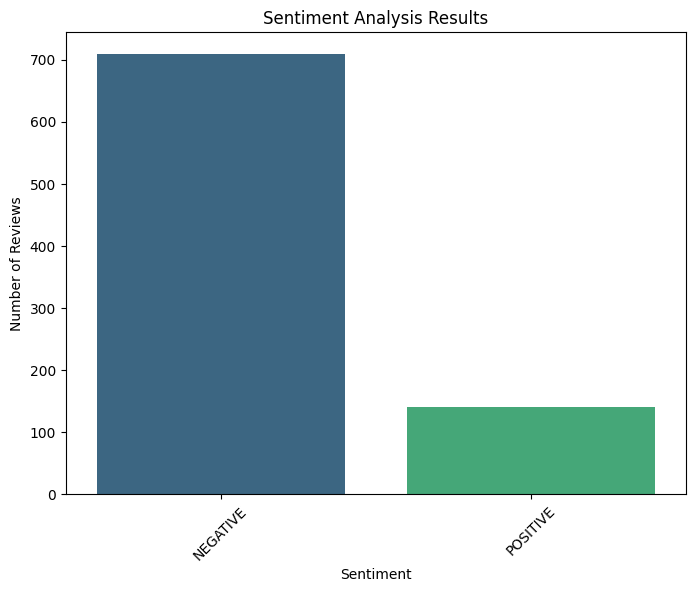

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each sentiment
sentiment_counts = df['SENTIMENT'].value_counts()

# Plotting the sentiment analysis results
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK stopwords if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

# Define the function for text normalization
def normalize_text(text):
    # Lowercase the text
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Join tokens back into a single string
    return ' '.join(tokens)

# Remove rows where the 'Review' column contains "No Review Text"
df = df[df['Review'] != 'No Review Text']

# Apply the normalization function to the Review column
df['CLEANED_REVIEW'] = df['Review'].apply(normalize_text)

# Display the DataFrame with the cleaned text
df[['Review', 'CLEANED_REVIEW']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,CLEANED_REVIEW
0,Amber and LaDonna at the Starbucks on Southwes...,amber ladonna starbucks southwest parkway alwa...
1,** at the Starbucks by the fire station on 436...,starbucks fire station 436 altamonte springs f...
2,I just wanted to go out of my way to recognize...,wanted go way recognize starbucks employee bil...
3,Me and my friend were at Starbucks and my card...,friend starbucks card ’ work thankful worker p...
4,I’m on this kick of drinking 5 cups of warm wa...,’ kick drinking 5 cups warm water work instaca...
...,...,...
841,"When using my debit card, how much and for how...",using debit card much long starbuck 's company...
842,I just bought a starbucks thermos mug about a ...,bought starbucks thermos mug month half ago va...
844,I'm (was) a regular customer who ordered a lat...,'m regular customer ordered latte 12:50pm tues...
845,I ordered two venti frappacino's without whipp...,ordered two venti frappacino 's without whippe...


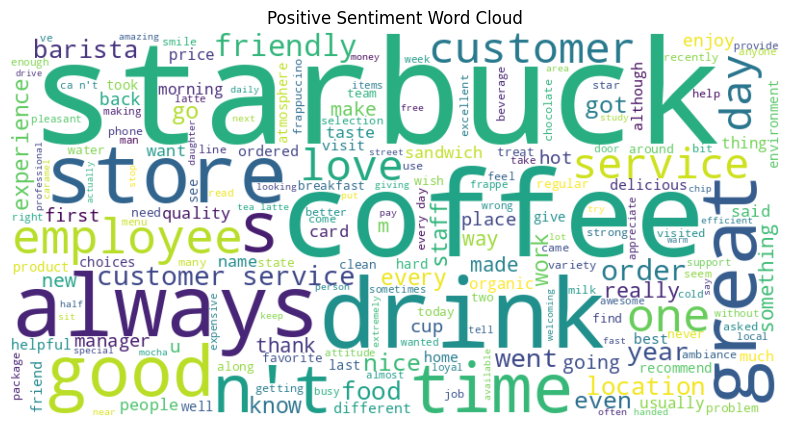

In [6]:
from wordcloud import WordCloud

# Define a function to generate and save a word cloud
def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

    # Save the word cloud as a PNG file
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()

positive_reviews = ' '.join(df[df['SENTIMENT'] == 'POSITIVE']['CLEANED_REVIEW'])
generate_wordcloud(positive_reviews, title='Positive Sentiment Word Cloud', filename='positive_sentiment_wordcloud.png')

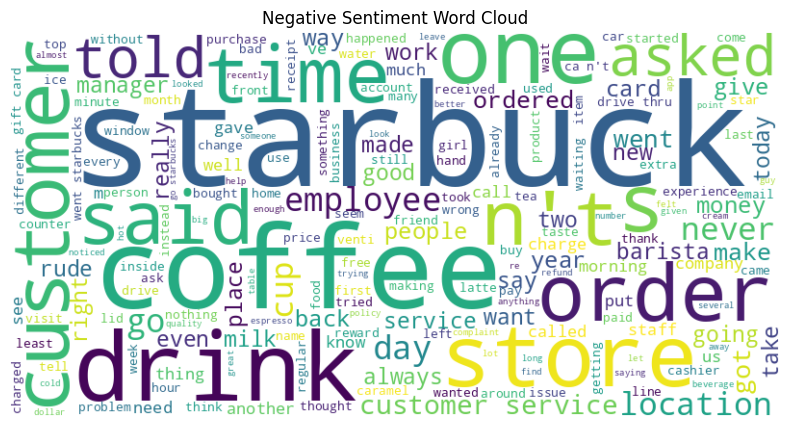

In [8]:
from wordcloud import WordCloud

# Define a function to generate and save a word cloud
def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)

    # Save the word cloud as a PNG file
    plt.savefig(filename, format='png', bbox_inches='tight')
    plt.show()

positive_reviews = ' '.join(df[df['SENTIMENT'] == 'NEGATIVE']['CLEANED_REVIEW'])
generate_wordcloud(positive_reviews, title='Negative Sentiment Word Cloud', filename='negative_sentiment_wordcloud.png')